#T√©cnicas pre-modelo por Sergio Maza y Luc√≠a Doval

El an√°lisis exploratorio de datos (EDA) y la visualizaci√≥n son herramientas fundamentales para interpretar y descubrir patrones ocultos en nuestros datos. Estas t√©cnicas nos permiten identificar caracter√≠sticas clave y representaciones significativas, incluso en conjuntos de datos grandes, mediante m√©todos de reducci√≥n de dimensionalidad como PCA (An√°lisis de Componentes Principales) y t-SNE (t-distributed Stochastic Neighbor Embedding).

Las t√©cnicas de interpretabilidad previas al modelo son independientes del modelo en s√≠, ya que se centran √∫nicamente en los datos. Este tipo de interpretabilidad suele llevarse a cabo antes de la selecci√≥n del modelo, lo cual es crucial para adquirir una comprensi√≥n profunda de los datos antes de tomar decisiones sobre el enfoque model√≠stico. Algunas propiedades que contribuyen a la interpretabilidad son la presencia de caracter√≠sticas intuitivas y significativas, as√≠ como un n√∫mero reducido de caracter√≠sticas.

Ahora, procederemos a realizar un an√°lisis exploratorio de datos para examinar la distribuci√≥n y la correlaci√≥n de nuestras variables.

##INDICE:
1. Importaci√≥n de bibliotecas

2. Carga del dataset

3. Limpieza de datos

4. Visualizaci√≥n del dataset

5. Perfilado del dataset (YData Profiling)

6. An√°lisis de modelos

    6.1 Modelos de regresi√≥n

    6.2 Modelos de clasificaci√≥n


# Imports

In [ ]:
import numpy as np # Importamos la librer√≠a NumPy, que se usa principalmente para trabajar con arreglos (arrays) y operaciones matem√°ticas de alto rendimiento.
import pandas as pd # Importamos Pandas, una librer√≠a fundamental para la manipulaci√≥n y an√°lisis de datos, en especial para trabajar con estructuras de datos como DataFrames.
import matplotlib.pyplot as plt # Importamos matplotlib.pyplot, que se utiliza para crear gr√°ficos y visualizaciones en 2D de forma f√°cil.
import seaborn as sns # Importamos seaborn, una librer√≠a de visualizaci√≥n de datos en Python.
from sklearn import metrics  # Importa el m√≥dulo 'metrics' de scikit-learn para evaluar el rendimiento del modelo.
from sklearn.metrics import accuracy_score, roc_curve, auc # Importa funciones espec√≠ficas para calcular la precisi√≥n, la curva ROC y el AUC.

# Dataset

Antes de nada, ¬øsabemos responder a la pregunta sobre qu√© es un dataset? En caso de que no, un dataset (o conjunto de datos) es una colecci√≥n organizada de datos que suele estar estructurada en forma de una tabla, donde cada fila representa una instancia o registro y cada columna representa una caracter√≠stica o variable relacionada con esos registros. Los datasets se utilizan en una amplia variedad de contextos, desde an√°lisis de datos hasta entrenamientos de modelos de inteligencia artificial o machine learning.

In [ ]:
#Importamos el csv con la ruta deseada, puede ser local si estais utilizando jupyter, por ejemplo, en este caso se trata de un link a un archivo en drive
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1x-UWg2wr9GmFVnZSL5HDuaM-CfLBYZzG')
df.head() #Con esta instrucci√≥n podemos ver la cabecera de nuestros datos

Unnamed: 0         Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4
0         ID  Fecha/hora inicio         ph   Turbidez  Utilizada
1      23024       3/26/23 5:00      5,496      28,32        yes
2      23025       3/17/23 6:00       5,48      26,56        yes
3      23026       3/17/23 6:00       5,48      26,56        yes
4      23027        4/2/23 5:00      5,384      33,84        yes

## Nombre de las columnas

Lo primero que deber√≠amos hacer a la hora de trabajar con un dataset es conocer bien nuestros datos, sin embargo, podemos ver que el nombre de las columnas es "Unnamed: X", eso se debe a que el csv esta mal creado y los nombres de las columnas estan en la fila 2. Se podr√≠a cambiar el nombre de las columnas, pero la soluci√≥n mas optima es leer el csv desde la fila 2, esto lo podemos hacer con **pd.read_csv('url', header = 1)**

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1x-UWg2wr9GmFVnZSL5HDuaM-CfLBYZzG', header = 1)
df.head()

ID Fecha/hora inicio     ph Turbidez Utilizada
0  23024      3/26/23 5:00  5,496    28,32       yes
1  23025      3/17/23 6:00   5,48    26,56       yes
2  23026      3/17/23 6:00   5,48    26,56       yes
3  23027       4/2/23 5:00  5,384    33,84       yes
4  23028       4/2/23 5:00  5,384    33,84       yes

Ahora que ya vemos bien nuestros datos pasemos a describirlos, es importante conocer la naturaleza de cada columna en nuestro dataset, para ser capaces de discernir si son necesarias o no en nuestro futuro entrenamiento, normalmente, estas columnas est√°n descritas en la documentaci√≥n de donde sacamos el dataset, de no ser as√≠, deberemos hacer una investigaci√≥n m√°s exahustiva para saber a qu√© se refiere cada una de las columnas.

##Descripci√≥n del Dataset

Este dataset simula datos generados en un proceso de creaci√≥n de una vacuna, donde el **pH** y la **turbidez** de diferentes muestras influyen en la decisi√≥n de utilizarla para eventualmente crear un ant√≠geno.

###Columnas:
- **ID**: Es un identificador √∫nico para cada registro o muestra. Sirve √∫nicamente para diferenciar las filas y no tiene valor predictivo o cient√≠fico en el an√°lisis.
- **Fecha/hora inicio**: Indica la fecha y hora en que se registraron los datos de la muestra. Puede ser √∫til para detectar patrones temporales o tendencias en la evoluci√≥n del proceso. Sin embargo, es importante evaluar si se usar√° para an√°lisis de series temporales o simplemente como referencia.
- **pH**: Mide la acidez o alcalinidad de la muestra. En este caso, es un valor num√©rico y es una variable clave en el an√°lisis. El pH influye en las condiciones de cultivo y en la decisi√≥n de seguir o no con la muestra para la creaci√≥n de un ant√≠geno.
- **Turbidez**: Mide la claridad o transparencia de la soluci√≥n, lo cual indica la concentraci√≥n de part√≠culas en suspensi√≥n. Es otra variable num√©rica importante para el an√°lisis, ya que puede influir en la calidad del cultivo.
- **Utilizada**: Es una variable categ√≥rica que indica si la muestra fue seleccionada ("yes") para continuar con el cultivo. Esta columna act√∫a como un indicador binario (s√≠/no), que ser√° el objetivo en futuras predicciones: predecir si, en funci√≥n del pH y la turbidez, una muestra ser√° utilizada.

# Cleaning Data

Ahora que conocemos bi√©n cada una de las columnas de nuestro dataset, podemos empezar a limpiarlo y analizarlo

## Variables categ√≥ricas -> num√©ricas

La columna 'Utilizada' es la √∫nica a simple vista que no contiene valores numericos.

In [ ]:
# Sacamos las clases de la columna 'Utilizada'
df['Utilizada'].unique()

array(['yes', 'no'], dtype=object)

Analizando esa columna podemos averiguar que se trata de una respuesta booleana yes/no, que la podremos sustituir por 0/1. Esto nos los facilita la herramienta de sklearn **Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Utilizada'] = label_encoder.fit_transform(df['Utilizada'])
df['Utilizada'].unique()

array([1, 0])

##Pasar los tipos de datos a num√©ricos

Para poder entrenar un modelo, es importante que los datos de nuestras columnas est√©n todos en num√©rico

In [ ]:
df.dtypes # Tipos de dato de las columnas

ID                    int64
Fecha/hora inicio    object
ph                   object
Turbidez             object
Utilizada             int64
dtype: object

A pesar de haber pasado la columna 'Utilizada' de categ√≥rica a n√∫merica. Con el **df.dtypes** vemos que hay 3 columnas que siguen siendo de tipo "object".

La columna 'Fecha/hora inicio' tiene sentido ya que es una fecha, pero el resto no. Asi que vamos a pasarlas a float

In [ ]:
# Lista de columnas para convertir a float
columns_to_convert = ['ph', 'Turbidez']

# Convertir esas columnas a float
df[columns_to_convert] = df[columns_to_convert].astype(float)
df.head(10)

ValueError: could not convert string to float: '5,496'

Cuando lo intentamos pasar a float vemos que nos da un error. El error se debe a que se esta utilizando una ',' en vez de un '.' Ese pod√≠a ser el motivo por el cual lo hacia ser de tipo 'object' en vez de float.

In [ ]:
 # Lista de columnas para convertir a float
columns_to_convert = ['ph', 'Turbidez']

# Reemplazar ',' -> '.'
df[columns_to_convert] = df[columns_to_convert].replace(',', '.', regex=True)

# Convertir esas columnas a float
df[columns_to_convert] = df[columns_to_convert].astype(float)
df.dtypes

ID                     int64
Fecha/hora inicio     object
ph                   float64
Turbidez             float64
Utilizada              int64
dtype: object

##Valores nulos

Ya tenemos todos los tipos de datos que nos interesan por lo que ahora vamos a tratar los **valores nulos**. Primero veremos cuantos hay y en que columnas est√°n:

In [ ]:
nan_per_column = df.isna().sum()
print(nan_per_column)

ID                   0
Fecha/hora inicio    0
ph                   2
Turbidez             2
Utilizada            0
dtype: int64


Vemos que solo hay 2 valores nulos tanto en el ph como en la turbidez. Antes de nada, tenemos que preguntarnos ¬øTiene sentido que existan valores nulos en estas columnas? En nuestro caso la respuesta es no.

Hay muchas maneras de enfrentar los valores nulos, en este caso como tenemos suficientes datos, son pocos los valores nulos, y son datos necesarios para saber si el producto final se ha aceptado o no; decidimos aproximarlos a la media:

In [ ]:
# Lista de columnas para NaN -> mean
columns_to_convert = ['ph', 'Turbidez']

# Reemplazar los NaN por la media de cada columna
df[columns_to_convert] = df[columns_to_convert].apply(lambda col: col.fillna(col.mean()))
print(df.isna().sum())

ID                   0
Fecha/hora inicio    0
ph                   0
Turbidez             0
Utilizada            0
dtype: int64


###T√©cnicas para eliminar valores nulos

Eliminar o tratar los **valores nulos** (o valores faltantes) es una tarea esencial durante la limpieza de datos. Dependiendo de la naturaleza del dataset y del problema que est√°s resolviendo, hay varias formas de manejar los valores nulos. Aqu√≠ te explico algunas estrategias comunes para tratarlos:

### 1. **Eliminar Filas o Columnas con Valores Nulos**

Esta es una estrategia directa, pero puede ser √∫til si los valores faltantes no son muchos o si la informaci√≥n que se pierde no es importante.

- **Eliminar Filas**: Si una fila tiene uno o m√°s valores nulos y esa fila no es crucial para tu an√°lisis, puedes eliminarla completamente.

    ```python
    df.dropna(axis=0, inplace=True)  # Elimina las filas con valores nulos
    ```

- **Eliminar Columnas**: Si una columna tiene muchos valores nulos y no parece ser √∫til o crucial para el an√°lisis, se puede eliminar.

    ```python
    df.dropna(axis=1, inplace=True)  # Elimina las columnas con valores nulos
    ```

Este m√©todo debe usarse con precauci√≥n, ya que podr√≠as estar perdiendo informaci√≥n valiosa si eliminas demasiados datos.

### 2. **Imputaci√≥n de Valores Faltantes**

Otra estrategia m√°s sofisticada es **imputar** (rellenar) los valores nulos con valores calculados o aproximados en lugar de eliminarlos.

- **Imputaci√≥n con la Media, Mediana o Moda**:
  - Para columnas num√©ricas:
    - **Media**: √ötil cuando los datos est√°n distribuidos de manera normal o aproximadamente normal.
      ```python
      df['columna'] = df['columna'].fillna(df['columna'].mean())  # Rellena con la media
      ```
    - **Mediana**: Mejor si los datos tienen una distribuci√≥n sesgada.
      ```python
      df['columna'] = df['columna'].fillna(df['columna'].median())  # Rellena con la mediana
      ```
  - Para columnas categ√≥ricas:
    - **Moda**: La moda es el valor m√°s frecuente en una columna, √∫til para datos categ√≥ricos.
      ```python
      df['columna'] = df['columna'].fillna(df['columna'].mode()[0])  # Rellena con la moda
      ```

- **Imputaci√≥n Basada en Modelos**:
  - Para imputar valores nulos de una forma m√°s avanzada, puedes utilizar modelos de machine learning (como K-Nearest Neighbors o Regresi√≥n Lineal) para predecir los valores faltantes en funci√≥n de las otras variables. Existen librer√≠as como **`IterativeImputer`** de `scikit-learn` que permiten hacer esto autom√°ticamente.

### 3. **Rellenar con un Valor Constante**

A veces es √∫til rellenar los valores nulos con un valor constante que tenga sentido en el contexto del problema.

- Para columnas num√©ricas:
  ```python
  df['columna'] = df['columna'].fillna(0)  # Rellena con 0
  ```

- Para columnas categ√≥ricas:
  ```python
  df['columna'] = df['columna'].fillna('Desconocido')  # Rellena con una etiqueta como 'Desconocido'
  ```

### 4. **Rellenar hacia Adelante o hacia Atr√°s (Forward/Backward Fill)**

Este m√©todo es √∫til para datos de series temporales o cuando los valores cercanos en el tiempo est√°n relacionados.

- **Forward Fill**: Rellena los valores nulos con el valor anterior no nulo.
  ```python
  df['columna'] = df['columna'].fillna(method='ffill')  # Rellena con el valor anterior
  ```

- **Backward Fill**: Rellena los valores nulos con el siguiente valor no nulo.
  ```python
  df['columna'] = df['columna'].fillna(method='bfill')  # Rellena con el siguiente valor
  ```

### 5. **Interpolaci√≥n**

La interpolaci√≥n es una t√©cnica para rellenar valores nulos calculando un valor intermedio en funci√≥n de los valores adyacentes. Es especialmente √∫til para datos num√©ricos y series temporales.

```python
df['columna'] = df['columna'].interpolate()  # Interpolaci√≥n lineal
```

Puedes ajustar el m√©todo de interpolaci√≥n, como `polynomial`, `spline`, o `time` para series temporales.

### 6. **Usar Variables Indicadoras (Flags)**

Otra t√©cnica es crear una columna indicadora que registre si el valor era originalmente nulo. Esto puede ser √∫til en algunos modelos de machine learning para no perder la informaci√≥n de que un valor estaba faltante.

```python
df['columna_null'] = df['columna'].isnull()  # Nueva columna que indica si el valor es nulo
df['columna'] = df['columna'].fillna(0)  # Luego rellenas con un valor adecuado
```

### Elecci√≥n del M√©todo

La elecci√≥n de la t√©cnica depende de varios factores:
- **Cantidad de valores nulos**: Si hay pocos valores nulos, eliminarlos podr√≠a ser suficiente. Si hay muchos, la imputaci√≥n es una mejor opci√≥n.
- **Tipo de datos**: La imputaci√≥n con la media o la mediana funciona bien para variables num√©ricas, pero para variables categ√≥ricas la moda o un valor constante es mejor.
- **Impacto en el an√°lisis**: Si una columna es cr√≠tica, es mejor intentar imputar sus valores. Si no es crucial, puede eliminarse.

Estas t√©cnicas aseguran que los valores nulos no introduzcan sesgos o errores en tu an√°lisis o modelo de machine learning.

##Duplicados

A continuaci√≥n miraremos si contamos con valores duplicados en nuestro dataset

In [ ]:
duplicados = df.duplicated()  # Devuelve una serie booleana indicando si cada fila es un duplicado o no
df[duplicados]  # Muestra solo las filas duplicadas

ID Fecha/hora inicio     ph  Turbidez  Utilizada
114  24020      1/25/24 0:30  5.448     35.04          1

Podemos ver que tenemos una fila de datos duplicados, sin embargo tambi√©n podemos verificar el numero de columnas duplicadas basandonos en un dato concreto

In [ ]:
# Verificar duplicados basados en dos columnas espec√≠ficas
duplicados = df.duplicated(subset=['ph', 'Turbidez'])

# Contar cu√°ntas filas est√°n duplicadas
num_duplicados = duplicados.sum()

print(f"N√∫mero de filas duplicadas: {num_duplicados}")

N√∫mero de filas duplicadas: 71


In [ ]:
df.shape #Esta instrucci√≥n nos muestra el tama√±o total de nuestro dataset, el primer numero son las filas y el segundo las columnas

(164, 5)

Como vemos, tenemos demasiados datos duplicados como para borrarlos, esto tambi√©n se debe a que es un dataset inventado, en este caso, no borraremos los datos duplicados de esas columnas, veremos posteriormente como nos enfrentaremos al problema de tener muchos duplicados. Si nos encontraramos con esta situaci√≥n en un caso real tendr√≠amos que tratar estos datos duplicados con cuidado, aqu√≠ dejamos una serie de recomendaciones:
- Entender la causa de los duplicados: Aseg√∫rate de que sabes por qu√© existen esos duplicados y si son v√°lidos o errores.
- Eliminar si no son √∫tiles: Si los duplicados son irrelevantes o representan un error, elim√≠nalos.
- Agrupar y resumir: Si los duplicados representan informaci√≥n √∫til, agr√∫palos y resume los valores.
- Crear una columna de peso: Si la frecuencia de duplicaci√≥n es importante, conserva los duplicados pero a√±ade una columna que refleje cu√°ntas veces aparecen.
- Cuidado con el sesgo: Si usas duplicados en modelos de machine learning, ten en cuenta que podr√≠an causar sesgo o sobreajuste.

In [ ]:
df.drop_duplicates(inplace=True) #borraremos solo los datos que tienen todas las columnas repetidas

#quiero agrupar todos los datos repetidos y crear una columna de frecuencia
df['Frecuencia'] = df.groupby(['ph', 'Turbidez']).cumcount() + 1
df.head()

ID Fecha/hora inicio     ph  Turbidez  Utilizada  Frecuencia
0  23024      3/26/23 5:00  5.496     28.32          1           1
1  23025      3/17/23 6:00  5.480     26.56          1           1
2  23026      3/17/23 6:00  5.480     26.56          1           2
3  23027       4/2/23 5:00  5.384     33.84          1           1
4  23028       4/2/23 5:00  5.384     33.84          1           2

## Shuffle

Una vez tenemos limpio nuestro dataset tenemos que evitar sesgos. Para ello vamos a mezclar los datos, pero *¬øPor qu√© hacemos esto?*

1. Evitar el Sesgo en el Modelo
Cuando los datos est√°n ordenados de una manera espec√≠fica (por ejemplo, por tiempo, categor√≠as o alguna otra caracter√≠stica), un modelo puede aprender patrones sesgados que no generalizan bien a datos nuevos. Al mezclar los datos:

- Se minimiza el sesgo: Los datos se distribuyen de manera m√°s uniforme en el conjunto de entrenamiento, evitando que el modelo aprenda patrones espec√≠ficos del orden original.
2. Aumentar la Generalizaci√≥n
Al mezclar los datos, se ayuda al modelo a generalizar mejor. Esto significa que:

- Mejora la capacidad de hacer predicciones sobre datos no vistos: El modelo se entrena en una variedad m√°s amplia de ejemplos, lo que ayuda a que no se ajuste demasiado a las caracter√≠sticas de un subconjunto de datos.
3. Asegurar Representatividad en Cada Batch
En algoritmos de aprendizaje por lotes (batch learning) o aprendizaje por mini-lotes (mini-batch learning), mezclar los datos garantiza que cada batch de datos que se utiliza para el entrenamiento contenga una representaci√≥n equilibrada de todas las clases o patrones en el dataset.

- Reducci√≥n de varianza: Esto puede ayudar a que el modelo tenga un entrenamiento m√°s estable y menos sensible a variaciones aleatorias en los datos.
4. Mejorar la Eficiencia del Entrenamiento
En algunos casos, especialmente en algoritmos que utilizan t√©cnicas de optimizaci√≥n como el descenso de gradiente, mezclar los datos puede llevar a una convergencia m√°s r√°pida. Esto se debe a que el algoritmo se expone a diferentes ejemplos en cada iteraci√≥n, lo que puede ayudar a mejorar la din√°mica del entrenamiento.

5. Evitar el Problema de Overfitting
Si hay patrones espec√≠ficos en los datos de entrenamiento (por ejemplo, si ciertos tipos de datos son m√°s prevalentes que otros), un modelo podr√≠a aprender esos patrones espec√≠ficos (overfitting). Al mezclar los datos:

- Se diversifican las muestras: Esto ayuda a que el modelo no se enfoque en caracter√≠sticas espec√≠ficas que solo aparecen en un orden particular.
###Ejemplo de Situaciones en las que Hacer Shuffle es Cr√≠tico
- Conjuntos de datos por tiempo: En series temporales, si tus datos est√°n organizados cronol√≥gicamente y no se mezclan, un modelo podr√≠a no captar adecuadamente patrones que son v√°lidos en todo el rango de datos.

- Conjuntos de datos desbalanceados: Si una clase es mucho m√°s prevalente que otra, mezclar los datos asegura que, durante el entrenamiento, el modelo vea ejemplos de todas las clases, ayudando a evitar que aprenda a predecir solo la clase dominante.

- **frac**: filas que quieres mezclar, siendo 1 el 100%, 0.5 el 50%, etc
- **random_state**: Semilla generadora. Al fijar una siempre se va a mezclar de la misma forma, si no la especificamos, cada vez que ejecutemos se mezclara de formas diferentes

In [ ]:
# Shuffle de los datos de entrenamiento
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

ID Fecha/hora inicio     ph  Turbidez  Utilizada  Frecuencia
0  24064      4/21/24 0:30  5.360     25.84          1           2
1  24014       2/8/24 0:30  5.488     34.88          1           1
2  24057      4/14/24 0:30  5.504     27.12          1           2
3  23081      9/10/23 5:00  5.496     28.40          1           1
4  23127     11/26/23 0:30  5.432     29.20          1           2

## Normalizar

Normalizaci√≥n se refiere a ajustar los valores de las caracter√≠sticas (features) de un conjunto de datos de manera que se encuentren en una escala com√∫n, lo que facilita el an√°lisis y el modelado. Esto es especialmente √∫til cuando las caracter√≠sticas tienen diferentes unidades de medida o escalas. Por ejemplo, si tienes una caracter√≠stica que mide el ingreso en miles de d√≥lares y otra que mide la edad en a√±os, sus magnitudes son muy diferentes.

Esto puede influir de mala manera en la importancia que le da el modelo a los datos, por ejemplo, en el ejemplo dado anteriormente, el ingreso de dolares tendr√≠a mucho m√°s peso que la edad en a√±os, sobretodo en algoritmos basados en distancias, como el KNN o Kmeans, adem√°s, en algoritmos basados en gradientes, tener los datos normalizados permite al modelo converger m√°s rapidamente. Adem√°s de que tener nuestros datos normalizados mejora la interpretabilidad ya que podemos ver m√°s facilmente que caracter√≠sticas influyen en el modelo.

Existen varios metodos de normalizaci√≥n, los m√°s comunes son los siguientes:

1. Min-Max Scaling:

Esta t√©cnica transforma los datos para que est√©n en un rango espec√≠fico, generalmente de 0 a 1, es el algoritmo que usaremos nosotros. Se utiliza la siguiente f√≥rmula:

image.png

Esto significa que el valor m√≠nimo se convierte en 0 y el m√°ximo se convierte en 1.
2. Z-Score Normalization (Estandarizaci√≥n):

Esta t√©cnica transforma los datos para que tengan una media de 0 y una desviaci√≥n est√°ndar de 1. La f√≥rmula es:

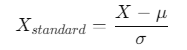

Donde
ùúá
Œº es la media y
ùúé
œÉ es la desviaci√≥n est√°ndar de la caracter√≠stica.
3. Robust Scaling:

Esta t√©cnica es √∫til para datos con outliers. Utiliza la mediana y el rango intercuartil (IQR) para escalar los datos:

image.png



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas que queremos escalar
columns_to_scale = ['ph', 'Turbidez']

scaler = MinMaxScaler()
df[['ph', 'Turbidez']] = scaler.fit_transform(df[columns_to_scale])
df.head()

ID Fecha/hora inicio        ph  Turbidez  Utilizada  Frecuencia
0  24064      4/21/24 0:30  0.122137  0.164420          1           2
1  24014       2/8/24 0:30  0.244275  0.469003          1           1
2  24057      4/14/24 0:30  0.259542  0.207547          1           2
3  23081      9/10/23 5:00  0.251908  0.250674          1           1
4  23127     11/26/23 0:30  0.190840  0.277628          1           2

En este punto ya hemos hecho lo siguiente:
- Variables categ√≥ricas a num√©ricas
- Parsear las columnas necesarias de 'object' a 'float'
- Tratamiento de valores nulos
- Eliminar valores duplicados
- Shuffle de datos
- Normalizaci√≥n

Ya tenemos listo nuestro dataset y ya podemos visualizarlo

# Visualizar dataset

Es importante saber visualizar el dataset para saber como funcionan nuestros datos

In [ ]:
type(df) # Tipo de dato del dataset

pandas.core.frame.DataFrame

In [ ]:
df.columns # Nombre de las columnas

Index(['ID', 'Fecha/hora inicio', 'ph', 'Turbidez', 'Utilizada', 'Frecuencia'], dtype='object')

In [ ]:
df.iloc[0] # Visualizacion de un dato

ID                          24064
Fecha/hora inicio    4/21/24 0:30
ph                       0.122137
Turbidez                  0.16442
Utilizada                       1
Frecuencia                      2
Name: 0, dtype: object

In [ ]:
df.describe() # Estadisticas del dataset

ID          ph    Turbidez   Utilizada  Frecuencia
count    163.000000  163.000000  163.000000  163.000000  163.000000
mean   23446.055215    0.225687    0.345140    0.803681    1.429448
std      475.092665    0.101642    0.185522    0.398437    0.496523
min    23024.000000    0.000000    0.000000    0.000000    1.000000
25%    23067.500000    0.167939    0.212938    1.000000    1.000000
50%    23111.000000    0.221374    0.323450    1.000000    1.000000
75%    24042.500000    0.267176    0.433962    1.000000    2.000000
max    24111.000000    1.000000    1.000000    1.000000    2.000000

In [ ]:
df.info() # Informacion del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 163 non-null    int64  
 1   Fecha/hora inicio  163 non-null    object 
 2   ph                 163 non-null    float64
 3   Turbidez           163 non-null    float64
 4   Utilizada          163 non-null    int64  
 5   Frecuencia         163 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
# @title Turbidez

from matplotlib import pyplot as plt
df['Turbidez'].plot(kind='hist', bins=20, title='Turbidez')
plt.gca().spines[['top', 'right',]].set_visible(False)

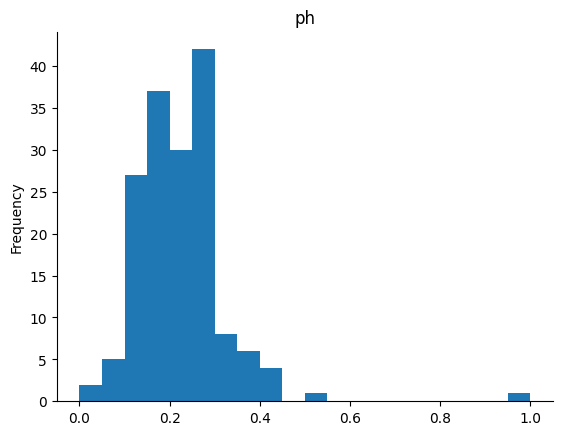

In [ ]:
# @title ph

from matplotlib import pyplot as plt
df['ph'].plot(kind='hist', bins=20, title='ph')
plt.gca().spines[['top', 'right',]].set_visible(False)

['ID', 'Fecha/hora inicio', 'ph', 'Turbidez', 'Frecuencia']


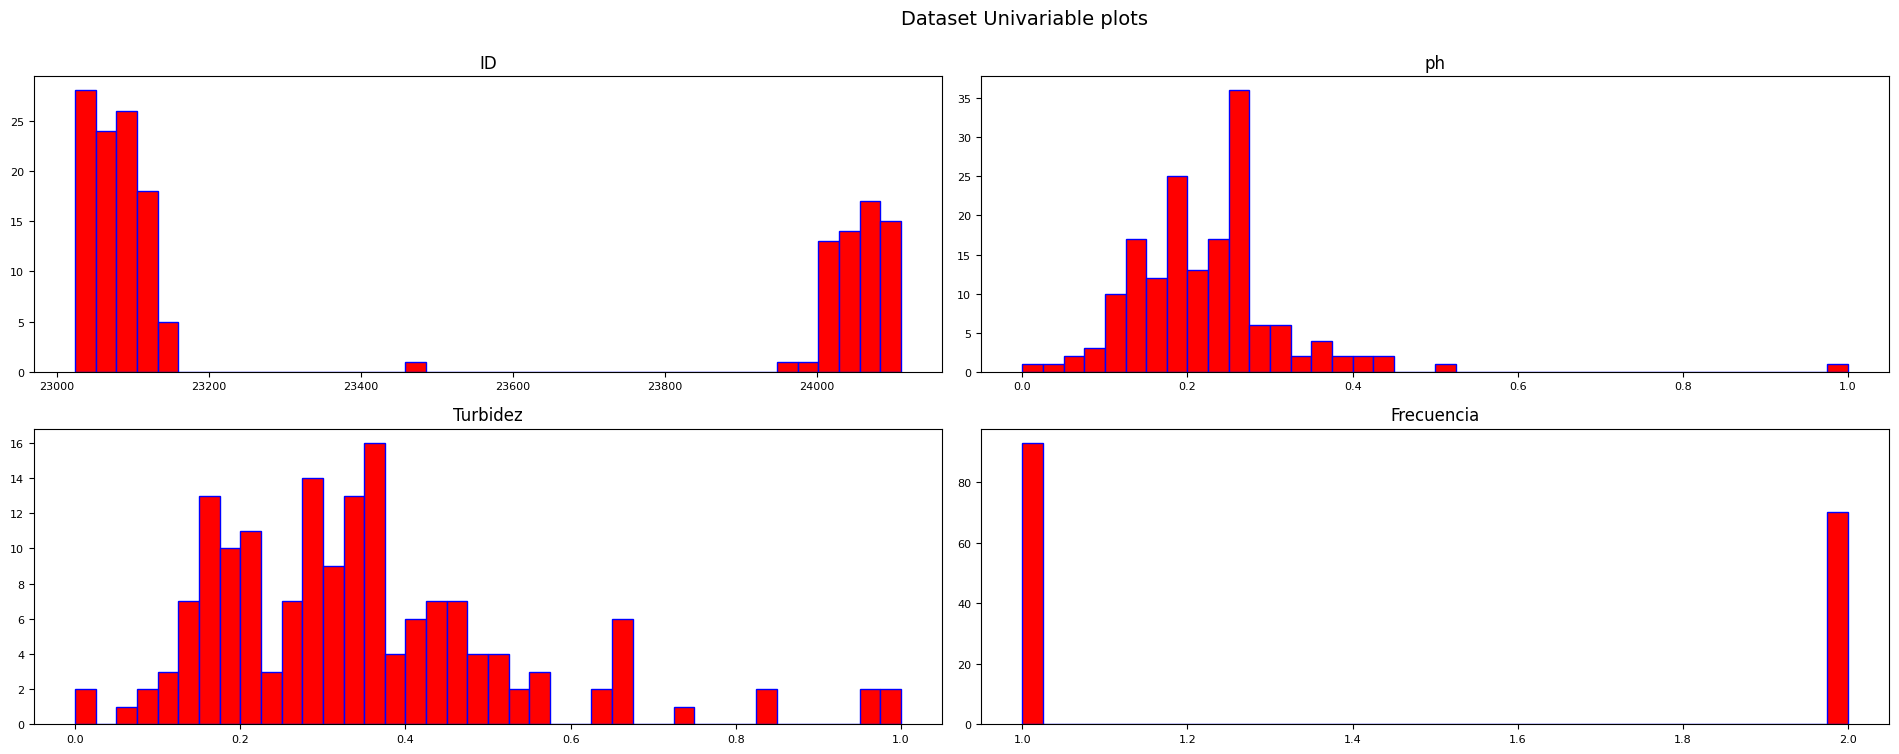

In [ ]:
# Extrayendo nuestra variable objetivo 'Utilizada'
# y creando una lista de caracter√≠sticas √∫tiles de las variables dependientes
target = 'Utilizada'
features_list = list(df.columns)
features_list.remove(target)
print(features_list)

df[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False,
                          figsize=(16,6), color='red')
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Dataset Univariable plots', x=0.65, y=1.25, fontsize=14);

A partir de estos graficos tenemos lo necesario para realizar un an√°lisis univariante, es decir, sacar conclusi√≥nes de una variable en un conjunto de datos.

###Objetivos del An√°lisis Univariante
- Describir la Variable:Proporciona un resumen de las caracter√≠sticas b√°sicas de la variable, como su media, mediana, moda, rango, varianza y desviaci√≥n est√°ndar.
- Identificar la Distribuci√≥n:Ayuda a entender la forma de la distribuci√≥n de la variable (normal, sesgada, uniforme, etc.) a trav√©s de histogramas, gr√°ficos de densidad y otras visualizaciones.
- Detecci√≥n de Outliers: Permite identificar valores at√≠picos (outliers) que podr√≠an influir en el an√°lisis posterior. Los boxplots son √∫tiles para visualizar outliers.
- Determinar la Tendencia Central y la Dispersi√≥n: Ayuda a identificar d√≥nde se concentran los datos (tendencia central) y cu√°n dispersos est√°n (dispersi√≥n).

Es bueno aplicar esta t√©cnica a medida que vamos limpiando los datos para **explicar** cada una de nuestras acci√≥nes, como eliminar valores at√≠picos etc.

In [ ]:
import seaborn as sns
sns.heatmap(df[['ph', 'Turbidez', 'Utilizada']].corr(), annot=True)

<Axes: >

Con esta tabla que nos muestra el mapa de calor de las correlaci√≥nes de las variables nos puede ayudar a hacer un an√°lisis multivariante.

Objetivos del An√°lisis Multivariante
- Explorar Relaciones:Examinar c√≥mo las variables est√°n relacionadas entre s√≠. Esto puede incluir la identificaci√≥n de correlaciones y la evaluaci√≥n de c√≥mo una variable puede influir en otra.
- Reducir Dimensionalidad:Simplificar un conjunto de datos con muchas variables manteniendo la mayor cantidad de informaci√≥n posible. T√©cnicas como PCA (An√°lisis de Componentes Principales) se utilizan para lograr esto. En nuestro caso tenemos muy pocos datos.
- Clasificaci√≥n y Agrupaci√≥n:Agrupar o clasificar observaciones basadas en m√∫ltiples caracter√≠sticas. M√©todos como k-means y an√°lisis de cl√∫ster son ejemplos de esto. En nuestro caso no har√° falta.
- Modelar Interacciones: Construir modelos que representen c√≥mo m√∫ltiples variables influyen en una variable dependiente. Esto es com√∫n en la regresi√≥n m√∫ltiple y otros modelos predictivos.

# YData_Profiling

Con la herramienta ydata_profiling podemos obtener un analisis profundo de cada una de las variables de nuestro datasets, incluyendo representaciones visuales.

In [ ]:
pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport
df.profile_report()

# PyCaret

Con la herramienta PyCaret podemos obtener un analisis de nuestro dataset que nos muestra los diferentes modelos predictivos que podriamos utilizar. En nuestro caso nuestra label (Variable a predecir) es 'Utilizada' y ya sabemos que solo tiene valores 0/1. En caso de que nuestro label fuese una  variable continua tendriamos que usar modelos de regresion, pero en nuestro caso podemos usar ambos para ver cual tiene mejor precisi√≥n

In [ ]:
pip install pycaret

In [ ]:
df.head()

ID Fecha/hora inicio        ph  Turbidez  Utilizada  Frecuencia
0  24064      4/21/24 0:30  0.122137  0.164420          1           2
1  24014       2/8/24 0:30  0.244275  0.469003          1           1
2  24057      4/14/24 0:30  0.259542  0.207547          1           2
3  23081      9/10/23 5:00  0.251908  0.250674          1           1
4  23127     11/26/23 0:30  0.190840  0.277628          1           2

Nos quedamos solo con las columnas que queremos usar para las predicciones

In [ ]:
df = df[['ph', 'Turbidez', 'Utilizada']]
df.head()

ph  Turbidez  Utilizada
0  0.122137  0.164420          1
1  0.244275  0.469003          1
2  0.259542  0.207547          1
3  0.251908  0.250674          1
4  0.190840  0.277628          1

## Modelos de regresion:

In [ ]:
from pycaret.regression import setup, compare_models

# Preparar el entorno para PyCaret en modo de regresi√≥n
reg_setup = setup(data=df, target='Utilizada', preprocess=True)
best_model = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

| **Columna**     | **Descripci√≥n**                                                                                             |
|-----------------|-------------------------------------------------------------------------------------------------------------|
| **Model**       | Nombre del modelo de regresi√≥n evaluado.                                                                     |
| **MAE**         | _Mean Absolute Error_: Promedio de los errores absolutos entre las predicciones y los valores reales.         |
| **MSE**         | _Mean Squared Error_: Promedio de los errores al cuadrado, penalizando m√°s los errores grandes.               |
| **RMSE**        | _Root Mean Squared Error_: Ra√≠z cuadrada del MSE, medida de la dispersi√≥n de los errores.                    |
| **R2**          | _Coefficient of Determination_: Proporci√≥n de la varianza explicada por el modelo, valor de 1 indica ajuste perfecto. |
| **RMSLE**       | _Root Mean Squared Logarithmic Error_: Error en escala logar√≠tmica, √∫til cuando los datos tienen grandes rangos. |
| **MAPE**        | _Mean Absolute Percentage Error_: Error absoluto promedio expresado como un porcentaje del valor real.        |
| **TT (Sec)**    | Tiempo de entrenamiento del modelo en segundos (_Training Time_).                                             |


## Modelos de clasificaci√≥n

In [ ]:
from pycaret.classification import setup, compare_models

# Preparar el entorno para PyCaret
clf_setup = setup(data=df, target='Utilizada', preprocess=True)

# Comparar modelos
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

| **M√©trica**   | **Descripci√≥n**                                                                                                       |
|---------------|-----------------------------------------------------------------------------------------------------------------------|
| **Accuracy**  | Proporci√≥n de predicciones correctas sobre el total.                                                                  |
| **AUC**       | √Årea bajo la curva ROC, mide la capacidad de discriminar entre clases.                                                |
| **Recall**    | Proporci√≥n de positivos correctamente identificados.                                                                 |
| **Precision** | Proporci√≥n de verdaderos positivos entre los predichos como positivos.                                                |
| **F1**        | Media arm√≥nica entre precisi√≥n y recall, balance entre ambas.                                                         |
| **Kappa**     | Grado de acuerdo ajustado por el azar entre predicciones y reales.                                                    |
| **MCC**       | Correlaci√≥n entre las predicciones y las etiquetas reales.                                                           |
| **TT (Sec)**  | Tiempo de entrenamiento del modelo en segundos (_Training Time_).                                                     |
